In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/cpu:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16512888214756251859]

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
from keras import models
from keras import layers

In [11]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

In [12]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [20]:
%%time

network.fit(train_images, train_labels, epochs=5, batch_size=2000)

Epoch 1/5
60000/60000 [==============================] - 1s - loss: 0.0462 - acc: 0.9871     
Epoch 2/5
60000/60000 [==============================] - 1s - loss: 0.0417 - acc: 0.9884     
Epoch 3/5
60000/60000 [==============================] - 1s - loss: 0.0379 - acc: 0.9900     
Epoch 4/5
60000/60000 [==============================] - 1s - loss: 0.0345 - acc: 0.9911     
Epoch 5/5
60000/60000 [==============================] - 1s - loss: 0.0317 - acc: 0.9922     
CPU times: user 52.7 s, sys: 348 ms, total: 53.1 s
Wall time: 8.49 s


In [73]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

 9024/10000 [==========================>...] - ETA: 0s

In [74]:
print('test_acc: ', test_acc)

test_acc:  0.9471


In [75]:
train_images.ndim

2

In [90]:
train_images.dtype

dtype('float32')

In [95]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [96]:
digit = train_images[4]
digit.shape

(28, 28)

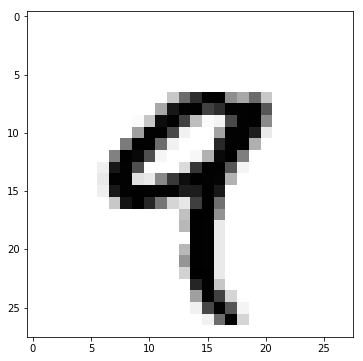

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6, 6))
plt.imshow(digit, cmap=plt.cm.binary);

In [104]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [106]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [1]:
import os

In [4]:
os.environ['CUDA_VISIBLE_DEVICES'] = '1'